## Import the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import os 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import plotly.graph_objects as go
import seaborn as sns
from PIL import Image
import warnings 
warnings.filterwarnings('ignore')

2024-10-29 14:16:56.568568: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-29 14:16:56.568695: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-29 14:16:56.715930: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load the data

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 
data = []
paths = []
result = []

for r, d, f in os.walk(r'../input/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

paths = []
for r, d, f in os.walk(r"../input/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [3]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [4]:
result = np.array(result)
result = result.reshape(139,2)

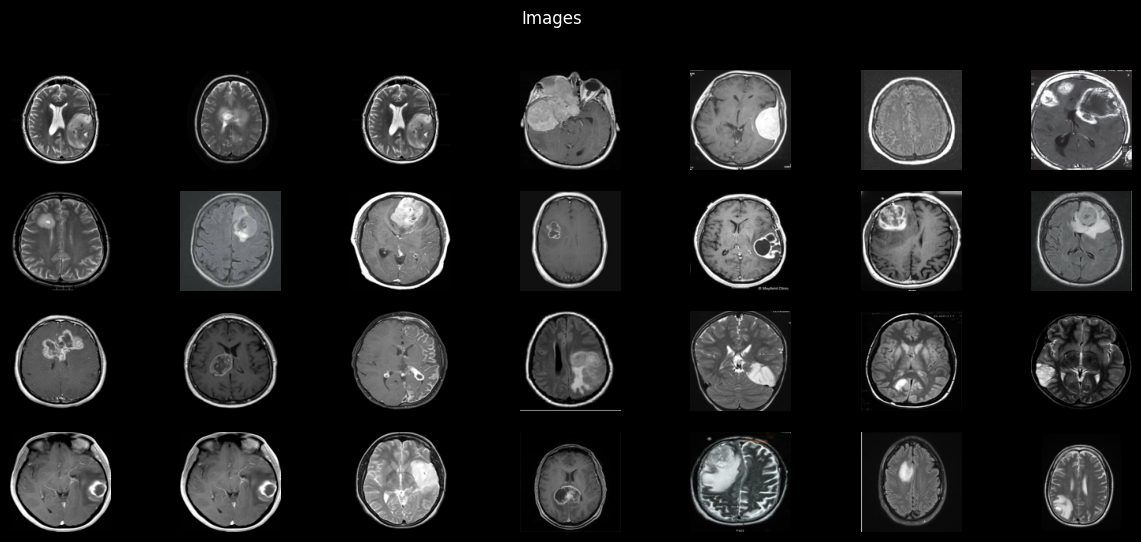

In [5]:
plt.figure(figsize=(15,6))
i = 1
for img in (data):
    plt.subplot(4,7,i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    i += 1
    if i > 7*4:
        break
plt.suptitle('Images');

## Split the data

In [6]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

## CNN model

In [7]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, monitor='loss')
]

In [8]:
model = keras.Sequential(
    [
    keras.layers.Conv2D(filters=32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'),
    keras.layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', padding='Same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu', padding='Same'),
    keras.layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu', padding='Same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
    ]
)

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, epochs = 25, batch_size = 40, verbose = True,validation_data = (x_test, y_test), callbacks=callbacks)

Epoch 1/25
1/3 ━━━━━━━━━━━━━━━━━━━━ 21s 11s/step - accuracy: 0.5500 - loss: 1.9262

I0000 00:00:1730211443.870067      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1730211443.894065      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.5057 - loss: 59.3645 - val_accuracy: 0.6071 - val_loss: 36.3130
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7104 - loss: 7.7315 - val_accuracy: 0.5000 - val_loss: 41.8759
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6535 - loss: 9.3247 - val_accuracy: 0.6071 - val_loss: 7.7663
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7745 - loss: 2.2591 - val_accuracy: 0.5714 - val_loss: 3.9523
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7770 - loss: 1.7537 - val_accuracy: 0.6071 - val_loss: 4.4106
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8595 - loss: 0.9899 - val_accuracy: 0.6786 - val_loss: 1.4905
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8453 - loss: 0.6817 - val_accuracy: 0.8214 - val_loss: 0.9722
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9202 - loss: 0.2127 - val_accuracy: 0.7857 - val_loss: 1.4849
Epoch 9/2

In [12]:
my_dict = history.history
number_range = []
for i in range(1, 31):
    number_range.append(i)
    
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']

fig = go.Figure()
fig.add_trace(go.Scatter(x=number_range, y=accuracy, mode='lines', name='accuracy'))
fig.add_trace(go.Scatter(x=number_range, y=val_accuracy, mode='lines', name='val_accuracy'))
fig.show()

In [13]:
import plotly.graph_objects as go

loss = my_dict['loss']
val_loss = my_dict['val_loss']

fig = go.Figure()
fig.add_trace(go.Scatter(x=number_range, y=loss, mode='lines', name='loss'))
fig.add_trace(go.Scatter(x=number_range, y=val_loss, mode='lines', name='val_loss'))

fig.update_layout(title='Loss vs. Val_loss',xaxis_title='Epoch',yaxis_title='Loss')

fig.show()


## test the model

In [14]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8214 - loss: 0.8789


[0.8789322972297668, 0.8214285969734192]

In [15]:
y_pred = model.predict(x_test)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test_bool = np.argmax(y_test, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


In [16]:
CR = classification_report(y_test_bool, y_pred_bool)
print(CR)

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.91      0.71      0.80        14

    accuracy                           0.82        28
   macro avg       0.84      0.82      0.82        28
weighted avg       0.84      0.82      0.82        28



In [17]:
print(f1_score(y_pred_bool, y_test_bool))

0.8


<Axes: >

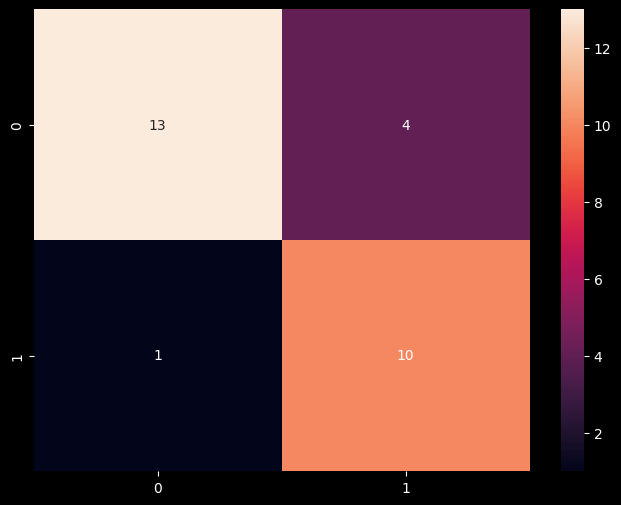

In [18]:
con = confusion_matrix(y_pred_bool, y_test_bool)
plt.figure(figsize=(8, 6))
sns.heatmap(con, annot=True)

## save model

In [19]:
model.save('model.h5')